# Final Project

In [545]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from sklearn.tree import export_graphviz
import pydot
from matplotlib.pyplot import figure
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import mean_squared_error
import _pickle as cPickle

In [197]:
final_data = pd.read_csv("final_data.csv")

In [3]:
def RMSLE(y_true, y_pred):
    result = np.sqrt(1/len(y_true)*np.sum((np.log(y_pred+1)-np.log(y_true+1))**2))
    return(result)

In [242]:
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', 500)

## EDA

In [199]:
final_data['Date'] =  pd.to_datetime(final_data['Date'], format='%Y-%m-%d')

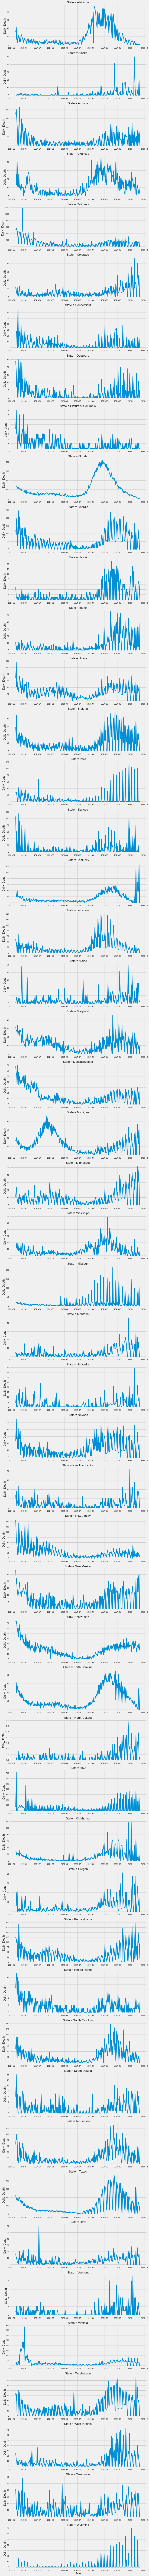

In [613]:
g = sns.FacetGrid(final_data, row="State",sharex=False, sharey=False,aspect = 3, height = 4)
g.map(sns.lineplot,"Date","Daily_Death")

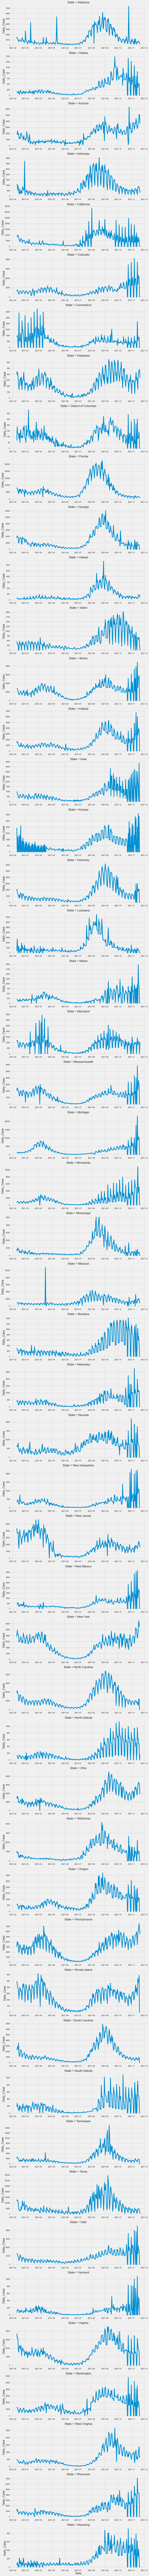

In [614]:
g = sns.FacetGrid(final_data, row="State",sharex=False, sharey=False,aspect = 3, height = 4)
g.map(sns.lineplot,"Date","Daily_Case")

In [201]:
Alabama_case = final_data.query('State == "Alabama"').Daily_Case

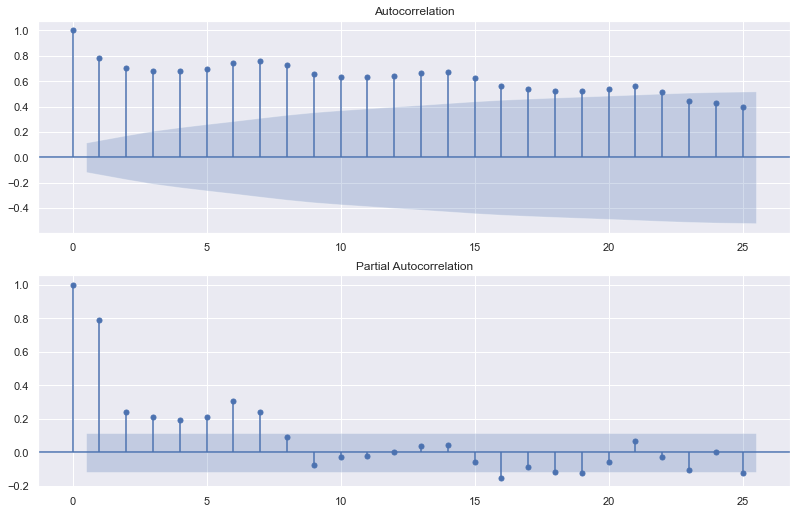

In [202]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Alabama_case, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Alabama_case, ax=ax2)

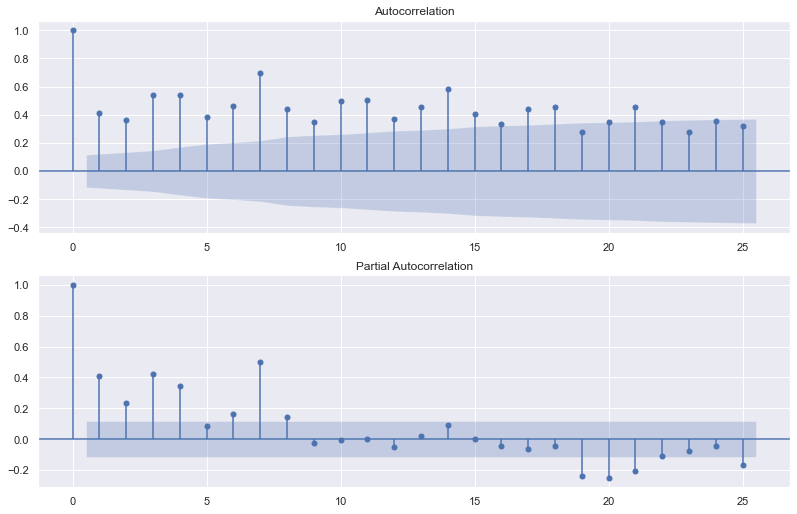

In [203]:
Cali_case = final_data.query('State == "California"').Daily_Case
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Cali_case, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Cali_case, ax=ax2)

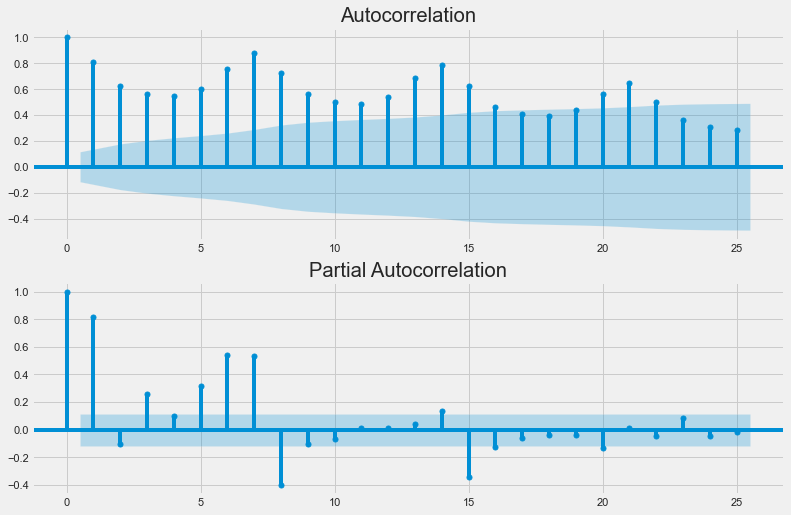

In [610]:
all_death = final_data.groupby(['Date']).sum().Daily_Death
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(all_death, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(all_death, ax=ax2)

/Users/montaxuan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


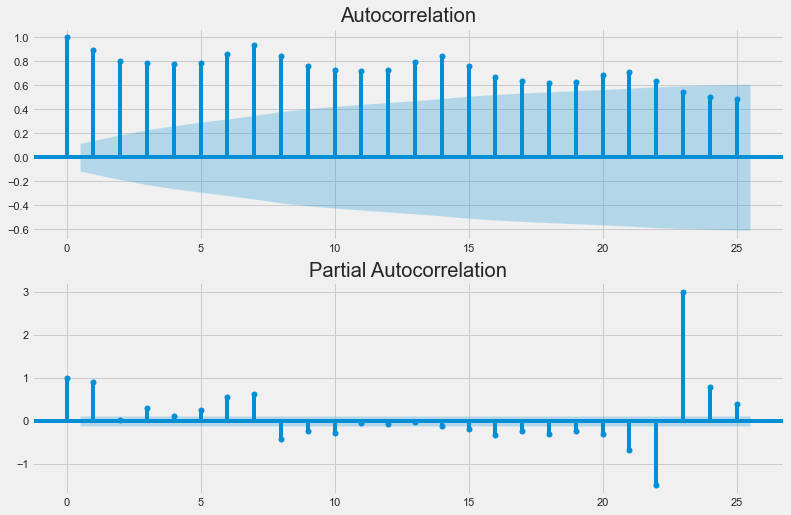

In [611]:
all_case = final_data.groupby(['Date']).sum().Daily_Case
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(all_case, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(all_case, ax=ax2)

In [205]:
population_plot = final_data.groupby(['State']).sum()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='population', ylabel='Daily_Case'>

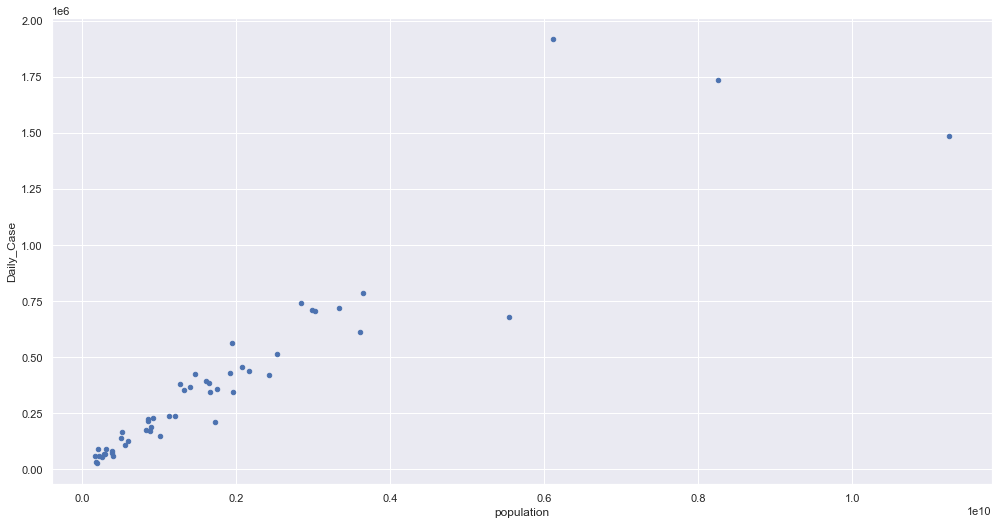

In [206]:
population_plot.plot.scatter(x='population',    y='Daily_Case')

In [207]:
population_plot['State'] = population_plot.index

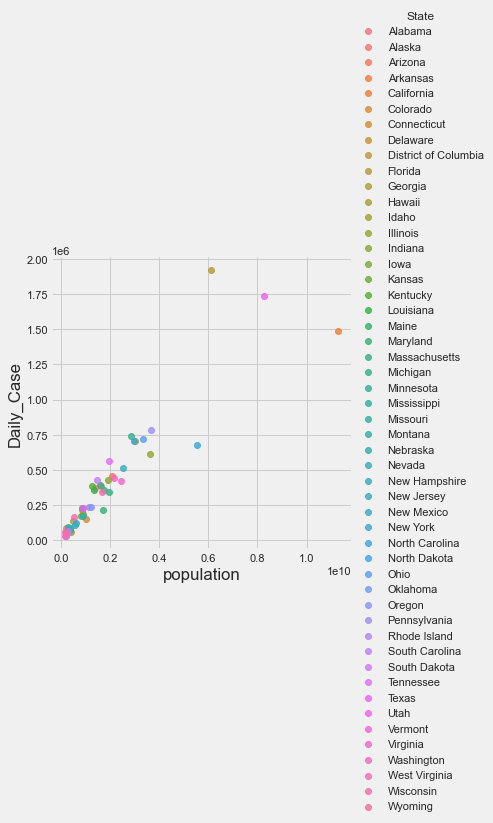

In [615]:
sns.lmplot(x='population', y='Daily_Case', data=population_plot, hue='State', fit_reg=False)
pass

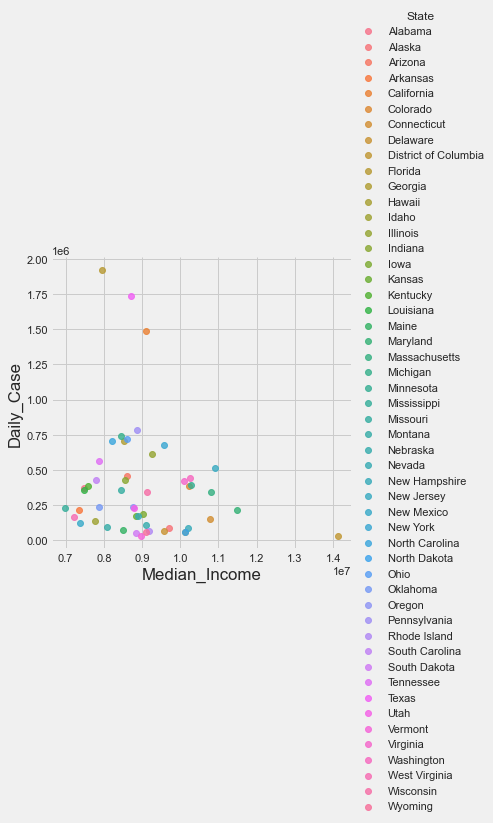

In [616]:
sns.lmplot(x='Median_Income', y='Daily_Case', data=population_plot, hue='State', fit_reg=False)
pass

## Featurn Engineering

## random forest

In [210]:
final_data_list = {}

In [211]:
num = range(7)

In [256]:
for i in num:
    final_data_test = final_data.copy(deep=True)
    j = i + 1
    final_data_test["lag"+str(j+0)+"c"] = final_data_test.groupby("State").Daily_Case.shift(j+0)
    final_data_test["lag"+str(j+1)+"c"] = final_data_test.groupby("State").Daily_Case.shift(j+1)
    final_data_test["lag"+str(j+2)+"c"] = final_data_test.groupby("State").Daily_Case.shift(j+2)
    final_data_test["lag"+str(j+3)+"c"] = final_data_test.groupby("State").Daily_Case.shift(j+3)
    final_data_test["lag"+str(j+4)+"c"] = final_data_test.groupby("State").Daily_Case.shift(j+4)
    final_data_test["lag"+str(j+5)+"c"] = final_data_test.groupby("State").Daily_Case.shift(j+5)
    final_data_test["lag"+str(j+6)+"c"] = final_data_test.groupby("State").Daily_Case.shift(j+6)
    
    final_data_test["lag"+str(j+0)+"d"] = final_data_test.groupby("State").Daily_Death.shift(j+0)
    final_data_test["lag"+str(j+1)+"d"] = final_data_test.groupby("State").Daily_Death.shift(j+1)
    final_data_test["lag"+str(j+2)+"d"] = final_data_test.groupby("State").Daily_Death.shift(j+2)
    final_data_test["lag"+str(j+3)+"d"] = final_data_test.groupby("State").Daily_Death.shift(j+3)
    final_data_test["lag"+str(j+4)+"d"] = final_data_test.groupby("State").Daily_Death.shift(j+4)
    final_data_test["lag"+str(j+5)+"d"] = final_data_test.groupby("State").Daily_Death.shift(j+5)
    final_data_test["lag"+str(j+6)+"d"] = final_data_test.groupby("State").Daily_Death.shift(j+6)
    
    final_data_test["lag"+str(j+0)+"t"] = final_data_test.groupby("State").tests_combined_total.shift(j+0)
    final_data_test["lag"+str(j+1)+"t"] = final_data_test.groupby("State").tests_combined_total.shift(j+1)
    final_data_test["lag"+str(j+2)+"t"] = final_data_test.groupby("State").tests_combined_total.shift(j+2)
    final_data_test["lag"+str(j+3)+"t"] = final_data_test.groupby("State").tests_combined_total.shift(j+3)
    final_data_test["lag"+str(j+4)+"t"] = final_data_test.groupby("State").tests_combined_total.shift(j+4)
    final_data_test["lag"+str(j+5)+"t"] = final_data_test.groupby("State").tests_combined_total.shift(j+5)
    final_data_test["lag"+str(j+6)+"t"] = final_data_test.groupby("State").tests_combined_total.shift(j+6)
    
    final_data_test["lag"+str(j+0)+"v"] = final_data_test.groupby("State").People_Fully_Vaccinated.shift(j+0)
    final_data_test["lag"+str(j+1)+"v"] = final_data_test.groupby("State").People_Fully_Vaccinated.shift(j+1)
    final_data_test["lag"+str(j+2)+"v"] = final_data_test.groupby("State").People_Fully_Vaccinated.shift(j+2)
    final_data_test["lag"+str(j+3)+"v"] = final_data_test.groupby("State").People_Fully_Vaccinated.shift(j+3)
    final_data_test["lag"+str(j+4)+"v"] = final_data_test.groupby("State").People_Fully_Vaccinated.shift(j+4)
    final_data_test["lag"+str(j+5)+"v"] = final_data_test.groupby("State").People_Fully_Vaccinated.shift(j+5)
    final_data_test["lag"+str(j+6)+"v"] = final_data_test.groupby("State").People_Fully_Vaccinated.shift(j+6)
    
    
    final_data_test = final_data_test.dropna().copy(deep = True)
    
    final_data_test['Fully_reopen']        = final_data_test['Fully_reopen'].astype('category')
    final_data_test['Mask_Mandate']        = final_data_test['Mask_Mandate'].astype('category')
    final_data_test['Vaccination_or_test'] = final_data_test['Vaccination_or_test'].astype('category')
    final_data_test['State']               = final_data_test['State'].astype('category')
    final_data_test['Region']              = final_data_test['Region'].astype('category')
    final_data_test['Division']            = final_data_test['Division'].astype('category')
    
    final_data_test = final_data_test.drop(columns=['People_Fully_Vaccinated', 'tests_combined_total']).copy(deep = True)

    final_data_list["final_data_"+str(j)] = final_data_test
    
    

## Model random forest

In [257]:
name_list = ["final_data_1",
             "final_data_2",
             "final_data_3",
             "final_data_4",
             "final_data_5",
             "final_data_6",
             "final_data_7"]

In [258]:
validation_set_list = {}

In [259]:
for i in num:
    validation_set_list["validation_set_"+str(i+1)] = final_data_list[name_list[i]].groupby("State").tail(7)
    final_data_list[name_list[i]] = final_data_list[name_list[i]].drop(final_data_list[name_list[i]].groupby("State").tail(7).index, axis=0).copy(deep = True)
    

In [264]:
X_case_1 = final_data_list[name_list[0]].drop(columns=['Daily_Death', 'Daily_Case','Date','State','state'])
X_case_1 = pd.get_dummies(X_case_1)
Y_case_1 = final_data_list[name_list[0]]["Daily_Case"]

X_train_case_1, X_test_case_1, y_train_case_1, y_test_case_1 = train_test_split(X_case_1, Y_case_1, test_size=0.2, random_state=42)


In [265]:
X_case_2 = final_data_list[name_list[1]].drop(columns=['Daily_Death', 'Daily_Case','Date','State','state'])
X_case_2 = pd.get_dummies(X_case_2)
Y_case_2 = final_data_list[name_list[1]]["Daily_Case"]

X_train_case_2, X_test_case_2, y_train_case_2, y_test_case_2 = train_test_split(X_case_2, Y_case_2, test_size=0.2, random_state=42)

In [266]:
X_case_3 = final_data_list[name_list[2]].drop(columns=['Daily_Death', 'Daily_Case','Date','State','state'])
X_case_3 = pd.get_dummies(X_case_3)
Y_case_3 = final_data_list[name_list[2]]["Daily_Case"]

X_train_case_3, X_test_case_3, y_train_case_3, y_test_case_3 = train_test_split(X_case_3, Y_case_3, test_size=0.2, random_state=42)

In [267]:
X_case_4 = final_data_list[name_list[3]].drop(columns=['Daily_Death', 'Daily_Case','Date','State','state'])
X_case_4 = pd.get_dummies(X_case_4)
Y_case_4 = final_data_list[name_list[3]]["Daily_Case"]

X_train_case_4, X_test_case_4, y_train_case_4, y_test_case_4 = train_test_split(X_case_4, Y_case_4, test_size=0.2, random_state=42)

In [268]:
X_case_5 = final_data_list[name_list[4]].drop(columns=['Daily_Death', 'Daily_Case','Date','State','state'])
X_case_5 = pd.get_dummies(X_case_5)
Y_case_5 = final_data_list[name_list[4]]["Daily_Case"]

X_train_case_5, X_test_case_5, y_train_case_5, y_test_case_5 = train_test_split(X_case_5, Y_case_5, test_size=0.2, random_state=42)

In [269]:
X_case_6 = final_data_list[name_list[5]].drop(columns=['Daily_Death', 'Daily_Case','Date','State','state'])
X_case_6 = pd.get_dummies(X_case_6)
Y_case_6 = final_data_list[name_list[5]]["Daily_Case"]

X_train_case_6, X_test_case_6, y_train_case_6, y_test_case_6 = train_test_split(X_case_6, Y_case_6, test_size=0.2, random_state=42)

In [270]:
X_case_7 = final_data_list[name_list[6]].drop(columns=['Daily_Death', 'Daily_Case','Date','State','state'])
X_case_7 = pd.get_dummies(X_case_7)
Y_case_7 = final_data_list[name_list[6]]["Daily_Case"]

X_train_case_7, X_test_case_7, y_train_case_7, y_test_case_7 = train_test_split(X_case_7, Y_case_7, test_size=0.2, random_state=42)

In [271]:
X_death_1 = final_data_list[name_list[0]].drop(columns=['Daily_Death', 'Daily_Case','Date','State','state'])
X_death_1 = pd.get_dummies(X_death_1)
Y_death_1 = final_data_list[name_list[0]]["Daily_Death"]

X_train_death_1, X_test_death_1, y_train_death_1, y_test_death_1 = train_test_split(X_death_1, Y_death_1, test_size=0.2, random_state=42)

In [272]:
X_death_2 = final_data_list[name_list[1]].drop(columns=['Daily_Death', 'Daily_Case','Date','State','state'])
X_death_2 = pd.get_dummies(X_death_2)
Y_death_2 = final_data_list[name_list[1]]["Daily_Death"]

X_train_death_2, X_test_death_2, y_train_death_2, y_test_death_2 = train_test_split(X_death_2, Y_death_2, test_size=0.2, random_state=42)

In [273]:
X_death_3 = final_data_list[name_list[2]].drop(columns=['Daily_Death', 'Daily_Case','Date','State','state'])
X_death_3 = pd.get_dummies(X_death_3)
Y_death_3 = final_data_list[name_list[2]]["Daily_Death"]

X_train_death_3, X_test_death_3, y_train_death_3, y_test_death_3 = train_test_split(X_death_3, Y_death_3, test_size=0.2, random_state=42)

In [274]:
X_death_4 = final_data_list[name_list[3]].drop(columns=['Daily_Death', 'Daily_Case','Date','State','state'])
X_death_4 = pd.get_dummies(X_death_4)
Y_death_4 = final_data_list[name_list[3]]["Daily_Death"]

X_train_death_4, X_test_death_4, y_train_death_4, y_test_death_4 = train_test_split(X_death_4, Y_death_4, test_size=0.2, random_state=42)

In [275]:
X_death_5 = final_data_list[name_list[4]].drop(columns=['Daily_Death', 'Daily_Case','Date','State','state'])
X_death_5 = pd.get_dummies(X_death_5)
Y_death_5 = final_data_list[name_list[4]]["Daily_Death"]

X_train_death_5, X_test_death_5, y_train_death_5, y_test_death_5 = train_test_split(X_death_5, Y_death_5, test_size=0.2, random_state=42)

In [276]:
X_death_6 = final_data_list[name_list[5]].drop(columns=['Daily_Death', 'Daily_Case','Date','State','state'])
X_death_6 = pd.get_dummies(X_death_6)
Y_death_6 = final_data_list[name_list[5]]["Daily_Death"]

X_train_death_6, X_test_death_6, y_train_death_6, y_test_death_6 = train_test_split(X_death_6, Y_death_6, test_size=0.2, random_state=42)

In [277]:
X_death_7 = final_data_list[name_list[6]].drop(columns=['Daily_Death', 'Daily_Case','Date','State','state'])
X_death_7 = pd.get_dummies(X_death_7)
Y_death_7 = final_data_list[name_list[6]]["Daily_Death"]

X_train_death_7, X_test_death_7, y_train_death_7, y_test_death_7 = train_test_split(X_death_7, Y_death_7, test_size=0.2, random_state=42)

In [27]:
rf_model_1 = RandomForestRegressor(n_estimators = 1000,random_state = 2021)
rf_model_1.fit(X_train_case_1,y_train_case_1)

RandomForestRegressor(n_estimators=1000, random_state=2021)

In [28]:
pred_case_1 = rf_model_1.predict(X_test_case_1)

In [31]:
feature_list_case_1 = list(X_train_case_1.columns)

In [33]:
# visualizing a single decision tree
tree_case_1 = rf_model_1.estimators_[5]
export_graphviz(tree_case_1, out_file = "tree_case_1.dot", feature_names = feature_list_case_1,rounded = True,precision = 1)

(graph, ) = pydot.graph_from_dot_file('tree_case_1.dot')


In [35]:
graph.write_png('tree_case_1.png')

#### importance plot

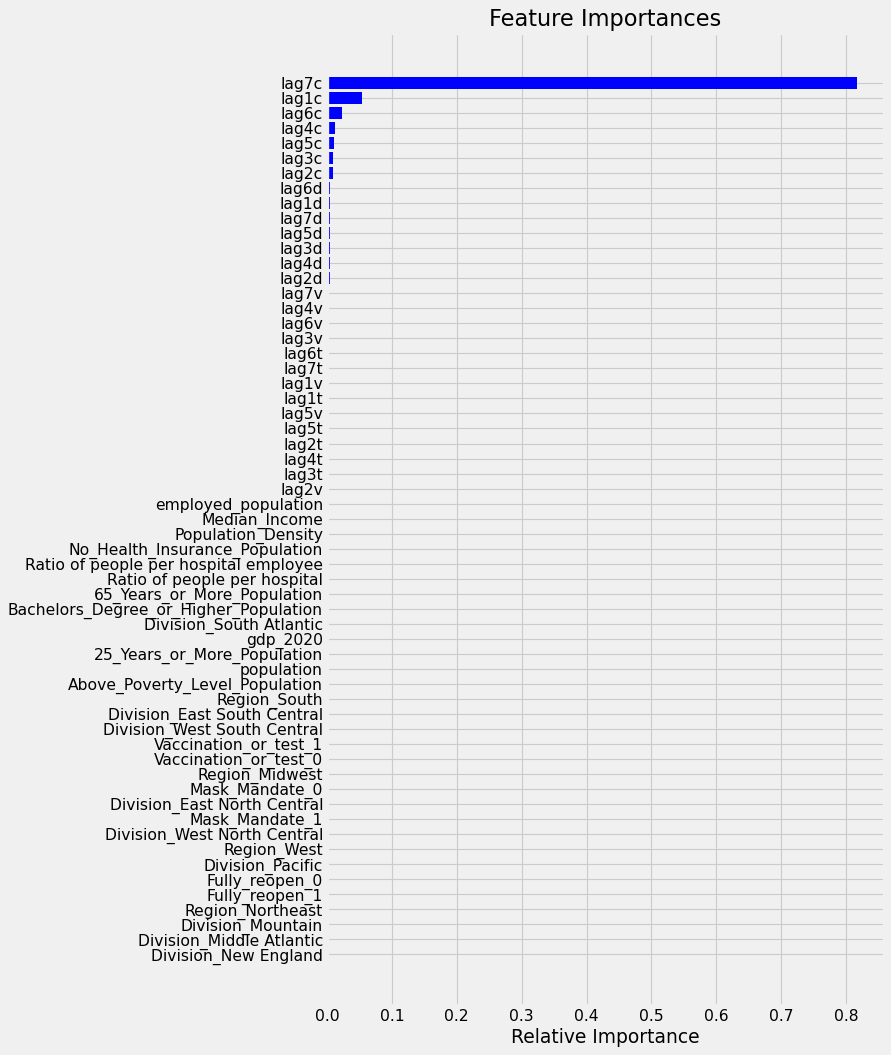

In [44]:
plt.style.use('fivethirtyeight')

importances_case_1 = rf_model_1.feature_importances_
indices = np.argsort(importances_case_1)


figure(figsize=(8, 15), dpi=80)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances_case_1[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_list_case_1[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## hyperparameter tuning

In [ ]:
rf_model_1 = RandomForestRegressor(n_estimators = 1000,random_state = 2021)

Basically, the best value of max_features of random forest algorithm can be approximately computed as the number of parameter numbers divided by 3.
I will try it and see what would happen in the first model I have.

In [55]:
pprint(rf_model_1.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2021,
 'verbose': 0,
 'warm_start': False}


In [73]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt',21]
max_depth = [int(x) for x in np.linspace(10, 150, num = 15)] + [None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

In [91]:
random_grid_case_1 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [92]:
pprint(random_grid_case_1)

{'max_depth': [10,
               20,
               30,
               40,
               50,
               60,
               70,
               80,
               90,
               100,
               110,
               120,
               130,
               140,
               150,
               None],
 'max_features': ['auto', 'sqrt', 21],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [90]:
rf_model_1 = RandomForestRegressor()

In [95]:
rf_random_case_1 = RandomizedSearchCV(estimator = rf_model_1, 
                                      param_distributions = random_grid_case_1, 
                                      n_iter = 100, 
                                      cv = 3, 
                                      verbose=2, 
                                      random_state=42, 
                                      n_jobs = -1)

In [96]:
rf_random_case_1.fit(X_train_case_1,y_train_case_1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150, None],
                                        'max_features': ['auto', 'sqrt', 21],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [97]:
rf_random_case_1.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 21,
 'max_depth': None}

In [99]:
pred_case_1 = rf_random_case_1.predict(X_test_case_1)

In [125]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(np.ma.masked_invalid(errors / test_labels))
    accuracy = 100 - mape
    print(test_labels)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [126]:
random_accuracy_case_1 = evaluate(rf_random_case_1.best_estimator_, 
                           X_test_case_1, 
                           y_test_case_1)

11338     232
12407       0
1617     2280
3749      958
607       570
         ... 
6553     2130
6690      147
5449      481
223      3061
8467     1304
Name: Daily_Case, Length: 2746, dtype: int64
Model Performance
Average Error: 277.5598 degrees.
Accuracy = 57.12%.


In [ ]:
rf_model_1 = RandomForestRegressor()

In [128]:
grid_case_1 = {
    'max_depth': [300,None],
    'max_features': [21,20],
    'min_samples_leaf': [1,2],
    'min_samples_split': [1, 2, 3],
    'n_estimators': [300,400, 1000]
}

In [129]:
grid_search_case_1 = GridSearchCV(estimator = rf_model_1, 
                                  param_grid = grid_case_1, 
                                  cv = 5, 
                                  verbose=2, 
                                  n_jobs = -1)

In [130]:
grid_search_case_1.fit(X_train_case_1,y_train_case_1)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/Users/montaxuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan 0.88652494 0.88613466 0.88699183
 0.88728409 0.88630782 0.88720492        nan        nan        nan
 0.88516395 0.8857215  0.88639733 0.88629935 0.88523854 0.88600955
        nan        nan        nan 0.88557956 0.88644433 0.8862118
 0.88678873 0.88675412 0.88762908        nan        nan        nan
 0.88584575 0.88625147 0.88675468 0.88562119 0.88568474 0.88616019
        nan        nan        nan 0.88572904 0.88625484 0.88733628
 0.88688986 0.88655227 0.8869244         nan        nan        nan
 0.88558456 0.88507241 0.88654554 0.88623712 0.88547371 0.88620576
        nan        nan        nan 0.88602586 0.88653282 0.88700716
 0.88789147 0.88655532 0.8870802         nan        nan        nan
 0.88500028 0.88606252 0.88613321 0.88563875 0.88596922 0.88671401]
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [300, None], 'max_features': [21, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [300, 400, 1000]},
             verbose=2)

In [228]:
grid_search_case_1.best_params_

{'max_depth': None,
 'max_features': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 300}

In [173]:
cv_results = rf_random_case_1.cv_results_
forplot_case_1 = pd.DataFrame({"param_n_estimators": cv_results["param_n_estimators"],
                               'param_max_features' : cv_results['param_max_features'],
                               'mean_test_score':cv_results['mean_test_score']})

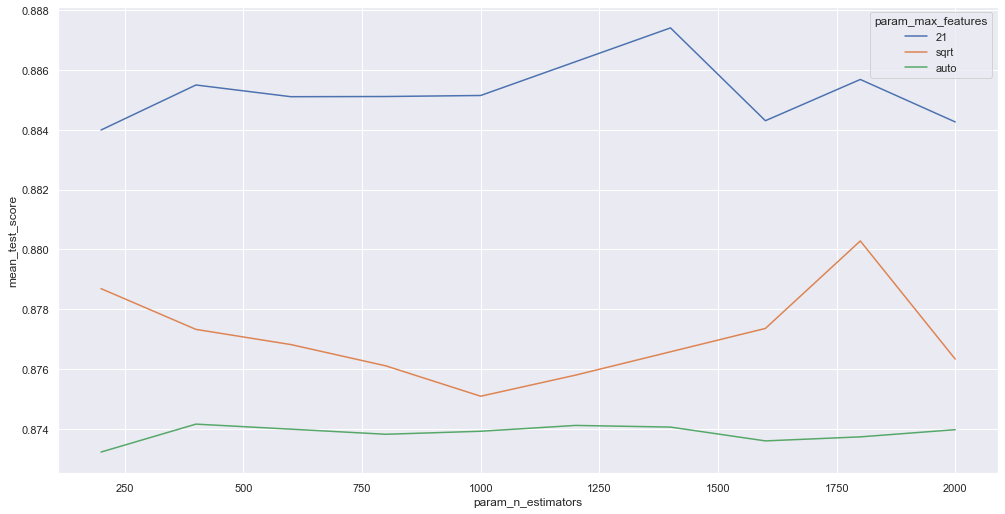

In [178]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.lineplot(data=forplot_case_1, x="param_n_estimators", y="mean_test_score", hue="param_max_features",err_style=None)
None

In [321]:
def model_and_rmse(X_train_case_1,y_train_case_1,X_test_case_1,y_test_case_1):
    """return the final model and the base model and their rmse"""
    rf_model_1_final = RandomForestRegressor(n_estimators = 1000,
                                         max_features = 20,
                                         min_samples_leaf = 1,
                                         min_samples_split = 3,
                                         random_state = 2021)
    rf_model_1_final.fit(X_train_case_1,y_train_case_1)
    
    
    
    rf_model_1_base = RandomForestRegressor(n_estimators = 1000,
                                            random_state = 2021)
    rf_model_1_base.fit(X_train_case_1,y_train_case_1)
    
    
    
    pred_case_1_final = rf_model_1_final.predict(X_test_case_1)
    rmse_case_1 = np.sqrt(mean_squared_error(y_test_case_1,pred_case_1_final))
    
    pred_case_1_base = rf_model_1_base.predict(X_test_case_1)
    rmse_case_1_base = np.sqrt(mean_squared_error(y_test_case_1,pred_case_1_base))
    
    
    return (rf_model_1_final,rf_model_1_base,rmse_case_1,rmse_case_1_base)

In [595]:
def importance_plot(X_train_case_1,rf_model_1_final):
    feature_list_case_1 = list(X_train_case_1.columns)
    importances_case_1 = rf_model_1_final.feature_importances_
    indices = np.argsort(importances_case_1)[-20:]

    figure(figsize=(8, 15), dpi=80)

    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances_case_1[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_list_case_1[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()


In [327]:
rf_final_model_case_list = {}
rf_base_model_case_list = {}

rf_final_rmse_case_list = {}
rf_base_rmse_case_list = {}

### Model 1

In [328]:
n = 1

In [333]:

rf_final_model_case_list["rf_final_model_case_"+str(n)],rf_base_model_case_list["rf_base_model_case_"+str(n)], rf_final_rmse_case_list["rf_final_rmse_case_"+str(n)],rf_base_rmse_case_list["rf_base_rmse_case_"+str(n)]= model_and_rmse(X_train_case_1,y_train_case_1,X_test_case_1,y_test_case_1)




In [341]:
rf_final_rmse_case_list

{'rf_final_rmse_case_1': 695.6514392419223}

In [342]:
rf_base_rmse_case_list

{'rf_base_rmse_case_1': 728.818646545664}

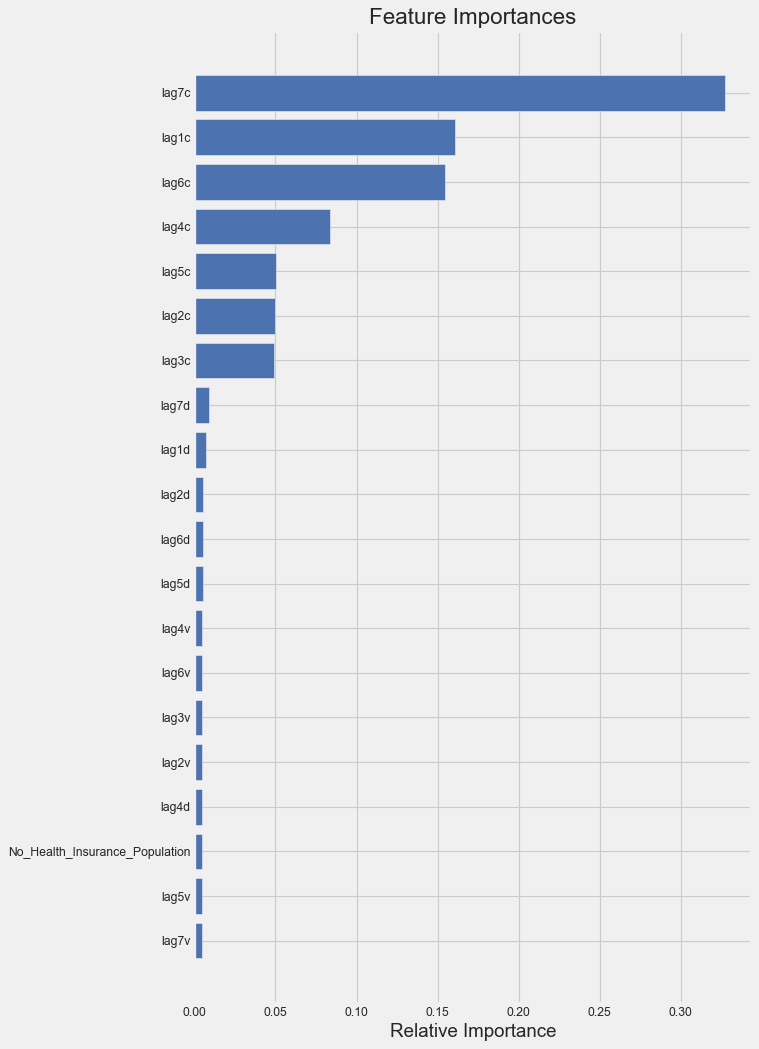

In [596]:
importance_plot(X_train_case_1,rf_final_model_case_list["rf_final_model_case_1"])

### Model 2

In [344]:
n = 2

In [345]:

rf_final_model_case_list["rf_final_model_case_"+str(n)],rf_base_model_case_list["rf_base_model_case_"+str(n)], rf_final_rmse_case_list["rf_final_rmse_case_"+str(n)],rf_base_rmse_case_list["rf_base_rmse_case_"+str(n)]= model_and_rmse(X_train_case_2,y_train_case_2,X_test_case_2,y_test_case_2)




In [346]:
rf_final_rmse_case_list

{'rf_final_rmse_case_1': 695.6514392419223,
 'rf_final_rmse_case_2': 718.4479645332505}

In [347]:
rf_base_rmse_case_list

{'rf_base_rmse_case_1': 728.818646545664,
 'rf_base_rmse_case_2': 718.0515149174145}

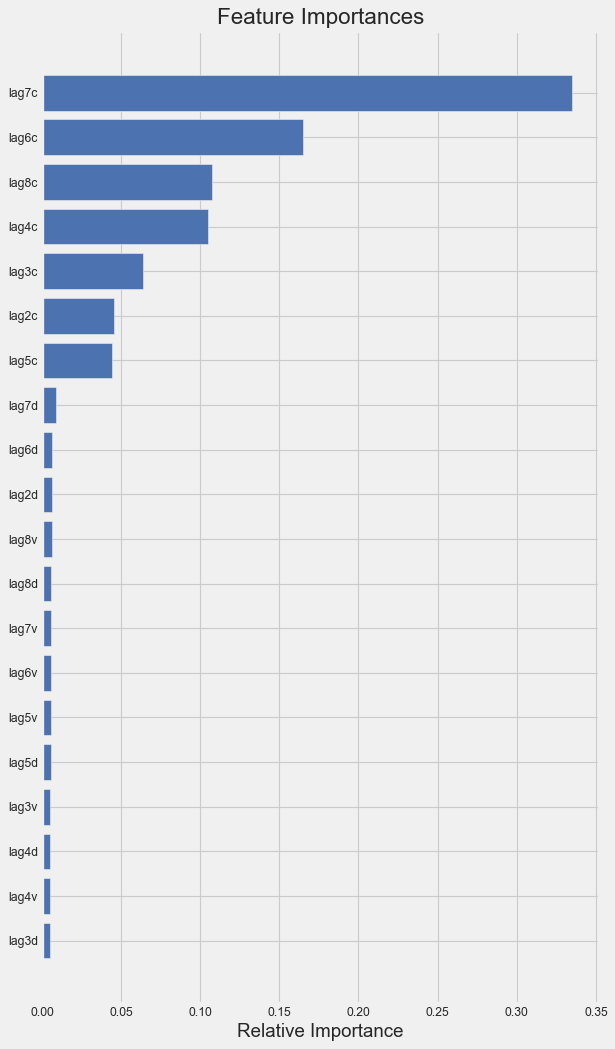

In [597]:
importance_plot(X_train_case_2,rf_final_model_case_list["rf_final_model_case_2"])

### Model 3

In [349]:
n = 3

In [350]:

rf_final_model_case_list["rf_final_model_case_"+str(n)],rf_base_model_case_list["rf_base_model_case_"+str(n)], rf_final_rmse_case_list["rf_final_rmse_case_"+str(n)],rf_base_rmse_case_list["rf_base_rmse_case_"+str(n)]= model_and_rmse(X_train_case_3,y_train_case_3,X_test_case_3,y_test_case_3)




In [351]:
rf_final_rmse_case_list

{'rf_final_rmse_case_1': 695.6514392419223,
 'rf_final_rmse_case_2': 718.4479645332505,
 'rf_final_rmse_case_3': 739.317905529717}

In [352]:
rf_base_rmse_case_list

{'rf_base_rmse_case_1': 728.818646545664,
 'rf_base_rmse_case_2': 718.0515149174145,
 'rf_base_rmse_case_3': 773.1696673898722}

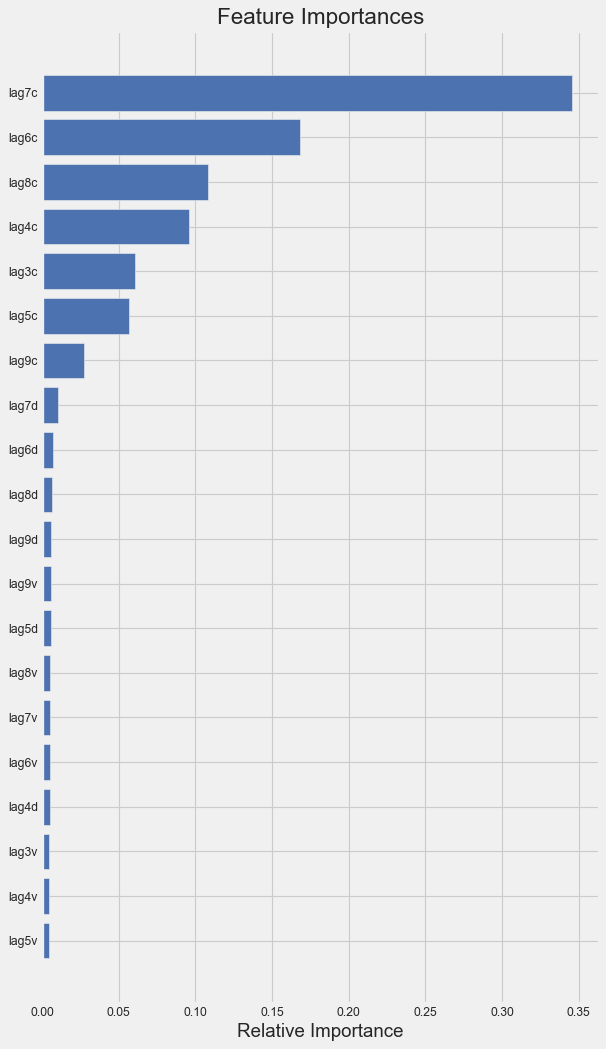

In [598]:
importance_plot(X_train_case_3,rf_final_model_case_list["rf_final_model_case_3"])

### Model 4

In [354]:
n = 4

In [355]:

rf_final_model_case_list["rf_final_model_case_"+str(n)],rf_base_model_case_list["rf_base_model_case_"+str(n)], rf_final_rmse_case_list["rf_final_rmse_case_"+str(n)],rf_base_rmse_case_list["rf_base_rmse_case_"+str(n)]= model_and_rmse(X_train_case_4,y_train_case_4,X_test_case_4,y_test_case_4)




In [356]:
rf_final_rmse_case_list

{'rf_final_rmse_case_1': 695.6514392419223,
 'rf_final_rmse_case_2': 718.4479645332505,
 'rf_final_rmse_case_3': 739.317905529717,
 'rf_final_rmse_case_4': 818.375038778384}

In [357]:
rf_base_rmse_case_list

{'rf_base_rmse_case_1': 728.818646545664,
 'rf_base_rmse_case_2': 718.0515149174145,
 'rf_base_rmse_case_3': 773.1696673898722,
 'rf_base_rmse_case_4': 863.7586169680801}

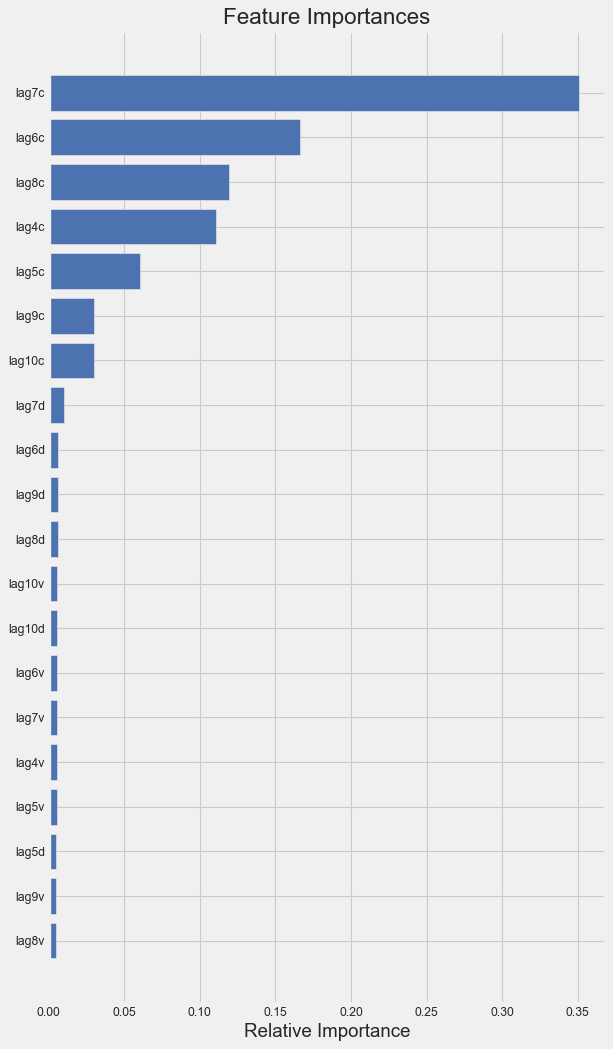

In [599]:
importance_plot(X_train_case_4,rf_final_model_case_list["rf_final_model_case_4"])

### Model 5

In [359]:
n = 5

In [360]:

rf_final_model_case_list["rf_final_model_case_"+str(n)],rf_base_model_case_list["rf_base_model_case_"+str(n)], rf_final_rmse_case_list["rf_final_rmse_case_"+str(n)],rf_base_rmse_case_list["rf_base_rmse_case_"+str(n)]= model_and_rmse(X_train_case_5,y_train_case_5,X_test_case_5,y_test_case_5)




In [361]:
rf_final_rmse_case_list

{'rf_final_rmse_case_1': 695.6514392419223,
 'rf_final_rmse_case_2': 718.4479645332505,
 'rf_final_rmse_case_3': 739.317905529717,
 'rf_final_rmse_case_4': 818.375038778384,
 'rf_final_rmse_case_5': 808.6400441742634}

In [362]:
rf_base_rmse_case_list

{'rf_base_rmse_case_1': 728.818646545664,
 'rf_base_rmse_case_2': 718.0515149174145,
 'rf_base_rmse_case_3': 773.1696673898722,
 'rf_base_rmse_case_4': 863.7586169680801,
 'rf_base_rmse_case_5': 835.6840096587235}

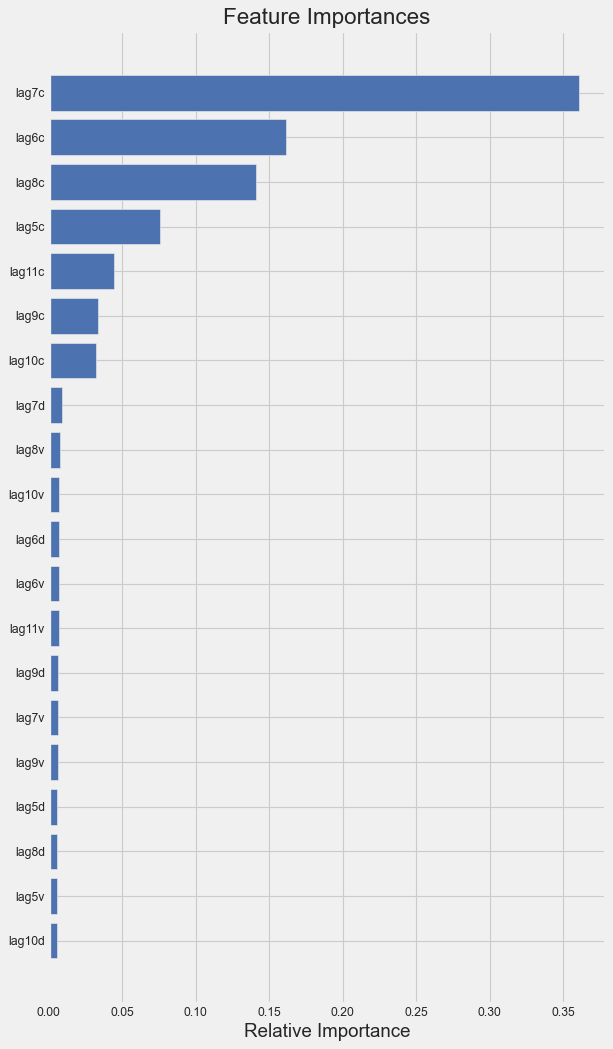

In [600]:
importance_plot(X_train_case_5,rf_final_model_case_list["rf_final_model_case_5"])

### Model 6

In [364]:
n = 6

In [365]:

rf_final_model_case_list["rf_final_model_case_"+str(n)],rf_base_model_case_list["rf_base_model_case_"+str(n)], rf_final_rmse_case_list["rf_final_rmse_case_"+str(n)],rf_base_rmse_case_list["rf_base_rmse_case_"+str(n)]= model_and_rmse(X_train_case_6,y_train_case_6,X_test_case_6,y_test_case_6)




In [366]:
rf_final_rmse_case_list

{'rf_final_rmse_case_1': 695.6514392419223,
 'rf_final_rmse_case_2': 718.4479645332505,
 'rf_final_rmse_case_3': 739.317905529717,
 'rf_final_rmse_case_4': 818.375038778384,
 'rf_final_rmse_case_5': 808.6400441742634,
 'rf_final_rmse_case_6': 860.4513663043768}

In [367]:
rf_base_rmse_case_list

{'rf_base_rmse_case_1': 728.818646545664,
 'rf_base_rmse_case_2': 718.0515149174145,
 'rf_base_rmse_case_3': 773.1696673898722,
 'rf_base_rmse_case_4': 863.7586169680801,
 'rf_base_rmse_case_5': 835.6840096587235,
 'rf_base_rmse_case_6': 876.1460918897312}

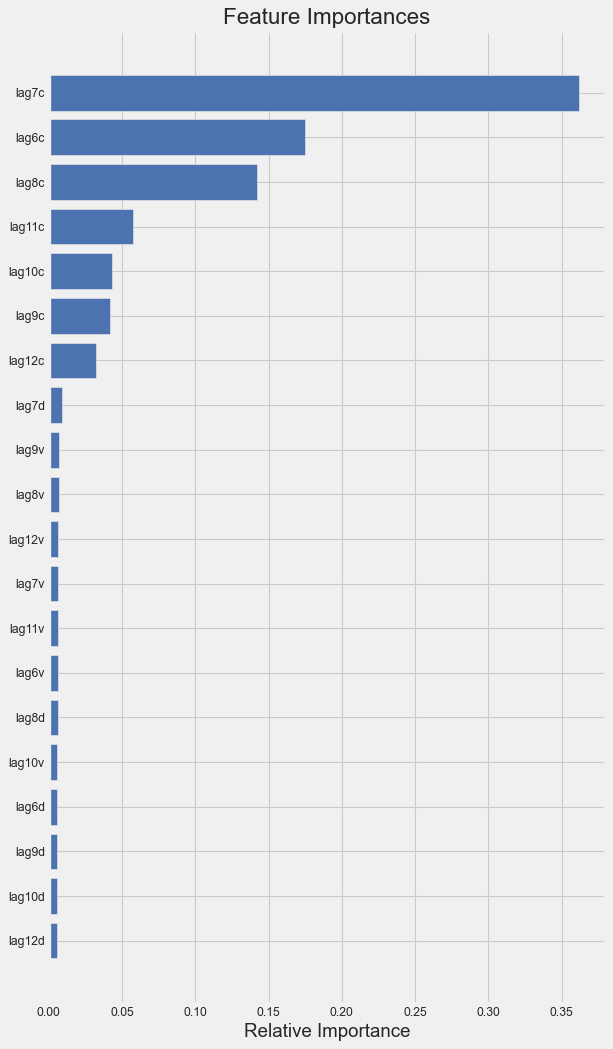

In [601]:
importance_plot(X_train_case_6,rf_final_model_case_list["rf_final_model_case_6"])

### Model 7

In [369]:
n = 7

In [370]:

rf_final_model_case_list["rf_final_model_case_"+str(n)],rf_base_model_case_list["rf_base_model_case_"+str(n)], rf_final_rmse_case_list["rf_final_rmse_case_"+str(n)],rf_base_rmse_case_list["rf_base_rmse_case_"+str(n)]= model_and_rmse(X_train_case_7,y_train_case_7,X_test_case_7,y_test_case_7)




In [371]:
rf_final_rmse_case_list

{'rf_final_rmse_case_1': 695.6514392419223,
 'rf_final_rmse_case_2': 718.4479645332505,
 'rf_final_rmse_case_3': 739.317905529717,
 'rf_final_rmse_case_4': 818.375038778384,
 'rf_final_rmse_case_5': 808.6400441742634,
 'rf_final_rmse_case_6': 860.4513663043768,
 'rf_final_rmse_case_7': 936.8354017070396}

In [372]:
rf_base_rmse_case_list

{'rf_base_rmse_case_1': 728.818646545664,
 'rf_base_rmse_case_2': 718.0515149174145,
 'rf_base_rmse_case_3': 773.1696673898722,
 'rf_base_rmse_case_4': 863.7586169680801,
 'rf_base_rmse_case_5': 835.6840096587235,
 'rf_base_rmse_case_6': 876.1460918897312,
 'rf_base_rmse_case_7': 976.5318223232637}

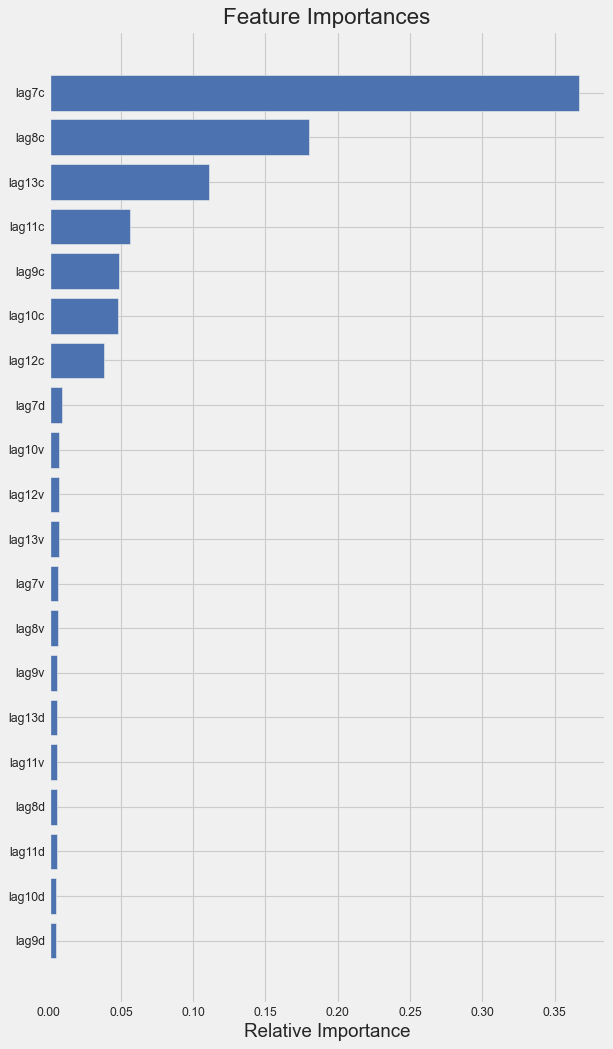

In [602]:
importance_plot(X_train_case_7,rf_final_model_case_list["rf_final_model_case_7"])

In [387]:
rf_final_model_case_list['rf_final_model_case_1']

RandomForestRegressor(max_features=20, min_samples_split=3, n_estimators=1000,
                      random_state=2021)

In [395]:
for i in num:
    with open('RF_model_'+str(i+1)+'_case.cpickle', 'wb') as f:
        cPickle.dump(rf_final_model_case_list['rf_final_model_case_'+str(i+1)], f)

In [397]:
rf_model_case_list = {}
for i in num:
    with open('RF_model_'+str(i+1)+'_case.cpickle', 'rb') as f:
        rf_model_case_list['rf_model_case_'+str(i+1)] = cPickle.load(f)

## Death

In [400]:
rf_final_model_death_list = {}
rf_base_model_death_list = {}

rf_final_rmse_death_list = {}
rf_base_rmse_death_list = {}

### Model 8

In [401]:
n = 1

In [402]:

rf_final_model_death_list["rf_final_model_death_"+str(n)],rf_base_model_death_list["rf_base_model_death_"+str(n)], rf_final_rmse_death_list["rf_final_rmse_death_"+str(n)],rf_base_rmse_death_list["rf_base_rmse_death_"+str(n)]= model_and_rmse(X_train_death_1,y_train_death_1,X_test_death_1,y_test_death_1)




In [403]:
rf_final_rmse_death_list

{'rf_final_rmse_death_1': 16.409483926144787}

In [404]:
rf_base_rmse_death_list

{'rf_base_rmse_death_1': 19.312517284225954}

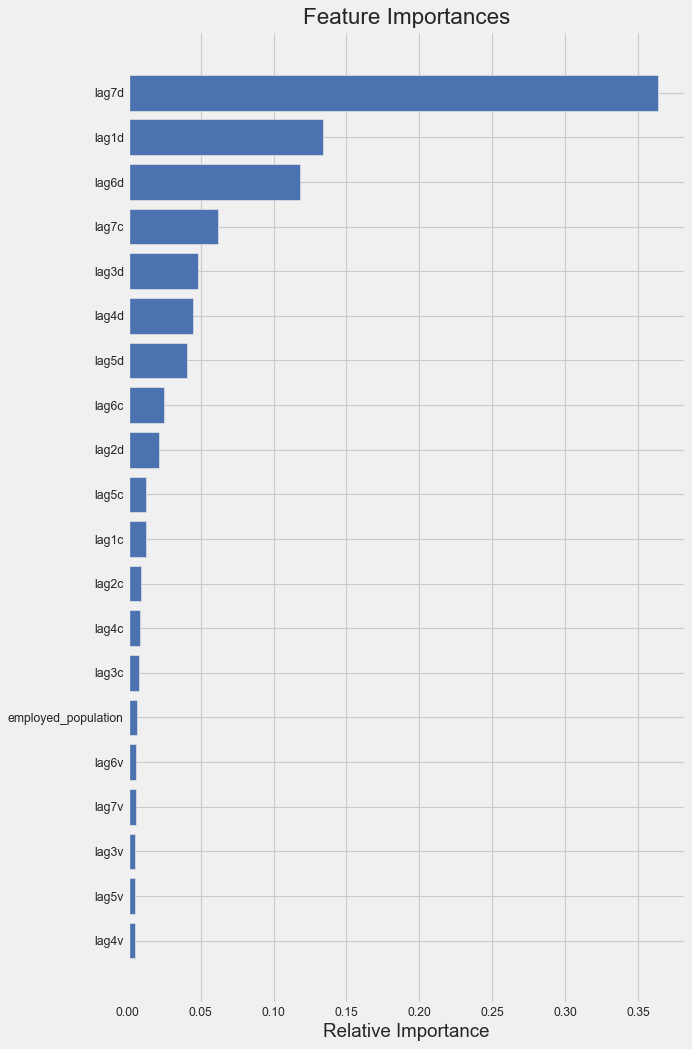

In [603]:
importance_plot(X_train_death_1,rf_final_model_death_list["rf_final_model_death_1"])

### Model 9

In [406]:
n = 2

In [407]:

rf_final_model_death_list["rf_final_model_death_"+str(n)],rf_base_model_death_list["rf_base_model_death_"+str(n)], rf_final_rmse_death_list["rf_final_rmse_death_"+str(n)],rf_base_rmse_death_list["rf_base_rmse_death_"+str(n)]= model_and_rmse(X_train_death_2,y_train_death_2,X_test_death_2,y_test_death_2)




In [408]:
rf_final_rmse_death_list

{'rf_final_rmse_death_1': 16.409483926144787,
 'rf_final_rmse_death_2': 15.491573644816812}

In [409]:
rf_base_rmse_death_list

{'rf_base_rmse_death_1': 19.312517284225954,
 'rf_base_rmse_death_2': 16.883758440591563}

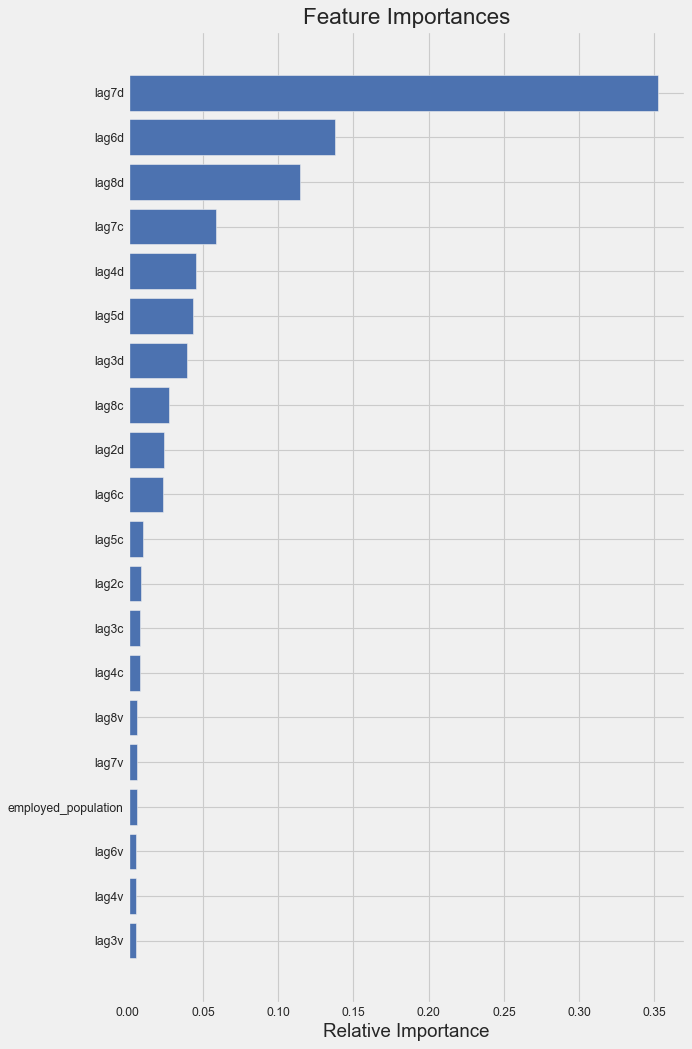

In [604]:
importance_plot(X_train_death_2,rf_final_model_death_list["rf_final_model_death_2"])

### Model 10

In [411]:
n = 3

In [412]:

rf_final_model_death_list["rf_final_model_death_"+str(n)],rf_base_model_death_list["rf_base_model_death_"+str(n)], rf_final_rmse_death_list["rf_final_rmse_death_"+str(n)],rf_base_rmse_death_list["rf_base_rmse_death_"+str(n)]= model_and_rmse(X_train_death_3,y_train_death_3,X_test_death_3,y_test_death_3)




In [413]:
rf_final_rmse_death_list

{'rf_final_rmse_death_1': 16.409483926144787,
 'rf_final_rmse_death_2': 15.491573644816812,
 'rf_final_rmse_death_3': 17.54346598368203}

In [414]:
rf_base_rmse_death_list

{'rf_base_rmse_death_1': 19.312517284225954,
 'rf_base_rmse_death_2': 16.883758440591563,
 'rf_base_rmse_death_3': 19.57816768524172}

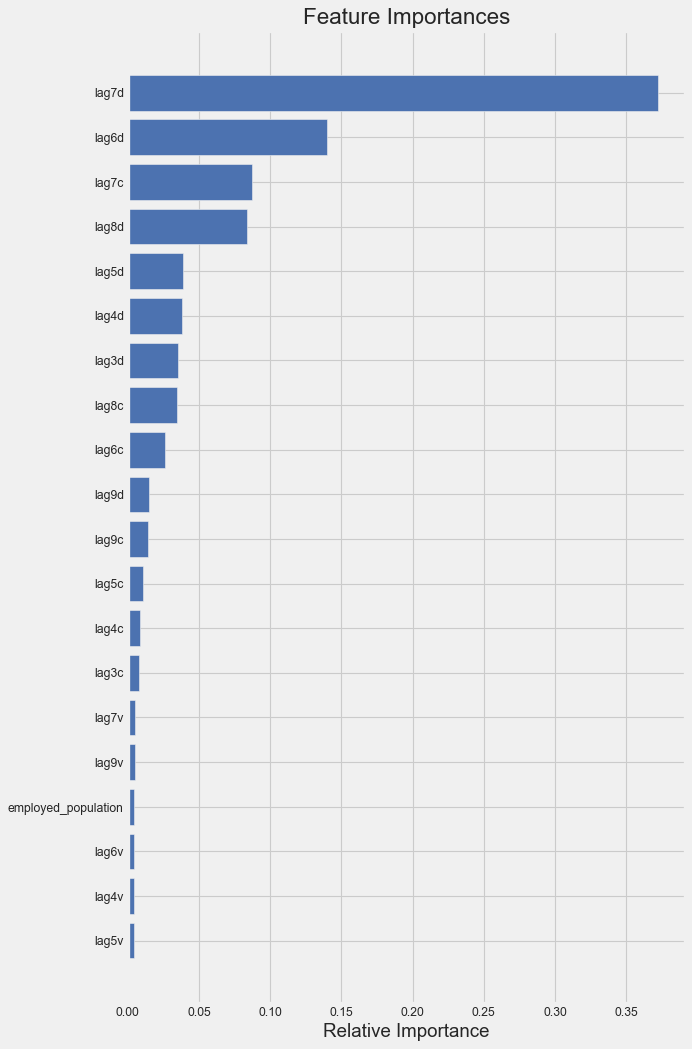

In [605]:
importance_plot(X_train_death_3,rf_final_model_death_list["rf_final_model_death_3"])

### Model 11

In [416]:
n = 4

In [417]:

rf_final_model_death_list["rf_final_model_death_"+str(n)],rf_base_model_death_list["rf_base_model_death_"+str(n)], rf_final_rmse_death_list["rf_final_rmse_death_"+str(n)],rf_base_rmse_death_list["rf_base_rmse_death_"+str(n)]= model_and_rmse(X_train_death_4,y_train_death_4,X_test_death_4,y_test_death_4)




In [418]:
rf_final_rmse_death_list

{'rf_final_rmse_death_1': 16.409483926144787,
 'rf_final_rmse_death_2': 15.491573644816812,
 'rf_final_rmse_death_3': 17.54346598368203,
 'rf_final_rmse_death_4': 15.610638968981622}

In [419]:
rf_base_rmse_death_list

{'rf_base_rmse_death_1': 19.312517284225954,
 'rf_base_rmse_death_2': 16.883758440591563,
 'rf_base_rmse_death_3': 19.57816768524172,
 'rf_base_rmse_death_4': 18.120198803594427}

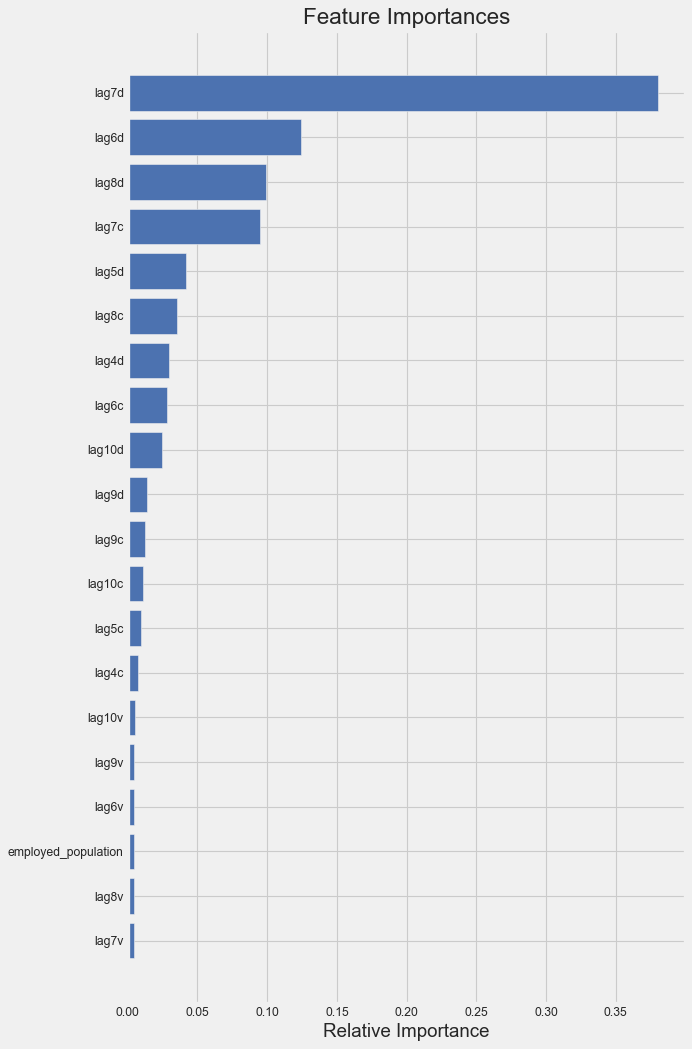

In [606]:
importance_plot(X_train_death_4,rf_final_model_death_list["rf_final_model_death_4"])

### Model 12

In [421]:
n = 5

In [422]:

rf_final_model_death_list["rf_final_model_death_"+str(n)],rf_base_model_death_list["rf_base_model_death_"+str(n)], rf_final_rmse_death_list["rf_final_rmse_death_"+str(n)],rf_base_rmse_death_list["rf_base_rmse_death_"+str(n)]= model_and_rmse(X_train_death_5,y_train_death_5,X_test_death_5,y_test_death_5)




In [423]:
rf_final_rmse_death_list

{'rf_final_rmse_death_1': 16.409483926144787,
 'rf_final_rmse_death_2': 15.491573644816812,
 'rf_final_rmse_death_3': 17.54346598368203,
 'rf_final_rmse_death_4': 15.610638968981622,
 'rf_final_rmse_death_5': 16.435140670178868}

In [424]:
rf_base_rmse_death_list

{'rf_base_rmse_death_1': 19.312517284225954,
 'rf_base_rmse_death_2': 16.883758440591563,
 'rf_base_rmse_death_3': 19.57816768524172,
 'rf_base_rmse_death_4': 18.120198803594427,
 'rf_base_rmse_death_5': 17.98009542975219}

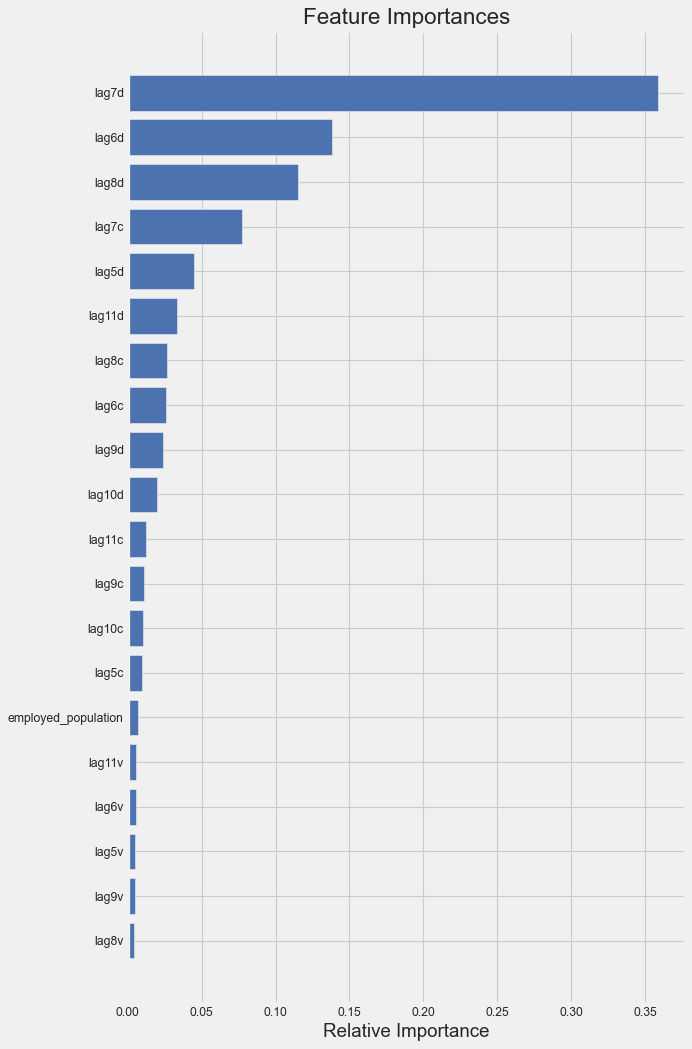

In [607]:
importance_plot(X_train_death_5,rf_final_model_death_list["rf_final_model_death_5"])

### Model 13

In [426]:
n = 6

In [427]:

rf_final_model_death_list["rf_final_model_death_"+str(n)],rf_base_model_death_list["rf_base_model_death_"+str(n)], rf_final_rmse_death_list["rf_final_rmse_death_"+str(n)],rf_base_rmse_death_list["rf_base_rmse_death_"+str(n)]= model_and_rmse(X_train_death_6,y_train_death_6,X_test_death_6,y_test_death_6)




In [428]:
rf_final_rmse_death_list

{'rf_final_rmse_death_1': 16.409483926144787,
 'rf_final_rmse_death_2': 15.491573644816812,
 'rf_final_rmse_death_3': 17.54346598368203,
 'rf_final_rmse_death_4': 15.610638968981622,
 'rf_final_rmse_death_5': 16.435140670178868,
 'rf_final_rmse_death_6': 16.226064581411784}

In [429]:
rf_base_rmse_death_list

{'rf_base_rmse_death_1': 19.312517284225954,
 'rf_base_rmse_death_2': 16.883758440591563,
 'rf_base_rmse_death_3': 19.57816768524172,
 'rf_base_rmse_death_4': 18.120198803594427,
 'rf_base_rmse_death_5': 17.98009542975219,
 'rf_base_rmse_death_6': 16.513169209410247}

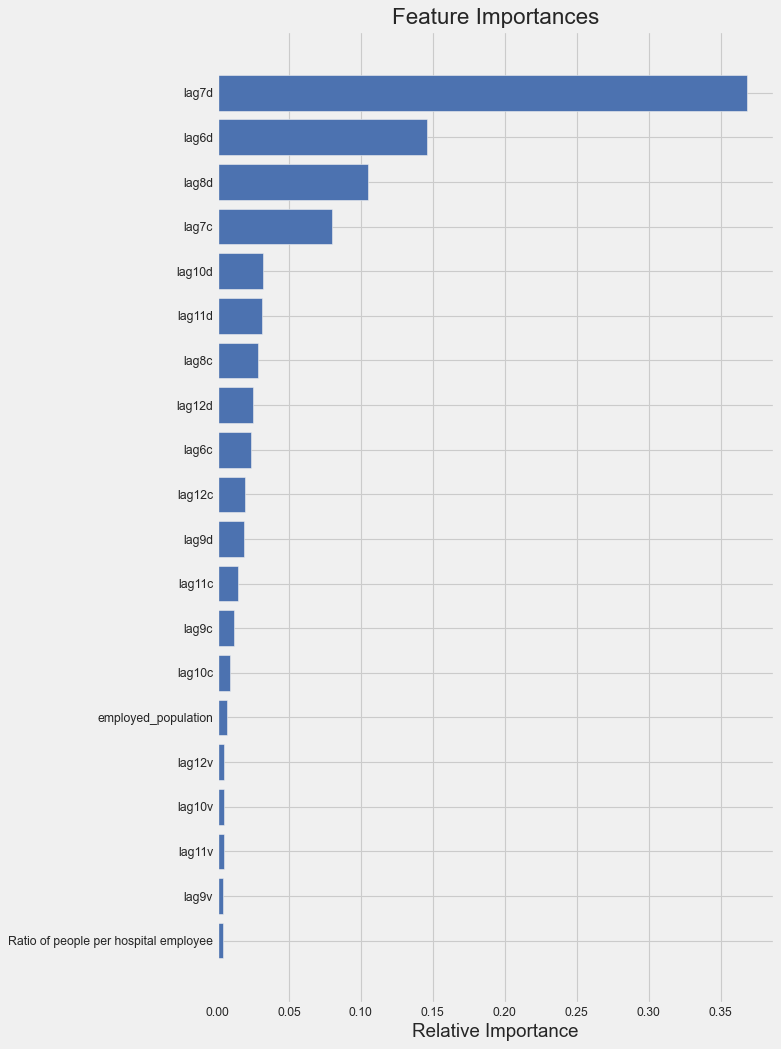

In [608]:
importance_plot(X_train_death_6,rf_final_model_death_list["rf_final_model_death_6"])

### Model 14

In [431]:
n = 7

In [432]:

rf_final_model_death_list["rf_final_model_death_"+str(n)],rf_base_model_death_list["rf_base_model_death_"+str(n)], rf_final_rmse_death_list["rf_final_rmse_death_"+str(n)],rf_base_rmse_death_list["rf_base_rmse_death_"+str(n)]= model_and_rmse(X_train_death_7,y_train_death_7,X_test_death_7,y_test_death_7)




In [433]:
rf_final_rmse_death_list

{'rf_final_rmse_death_1': 16.409483926144787,
 'rf_final_rmse_death_2': 15.491573644816812,
 'rf_final_rmse_death_3': 17.54346598368203,
 'rf_final_rmse_death_4': 15.610638968981622,
 'rf_final_rmse_death_5': 16.435140670178868,
 'rf_final_rmse_death_6': 16.226064581411784,
 'rf_final_rmse_death_7': 16.63329609073292}

In [434]:
rf_base_rmse_death_list

{'rf_base_rmse_death_1': 19.312517284225954,
 'rf_base_rmse_death_2': 16.883758440591563,
 'rf_base_rmse_death_3': 19.57816768524172,
 'rf_base_rmse_death_4': 18.120198803594427,
 'rf_base_rmse_death_5': 17.98009542975219,
 'rf_base_rmse_death_6': 16.513169209410247,
 'rf_base_rmse_death_7': 18.218080144283707}

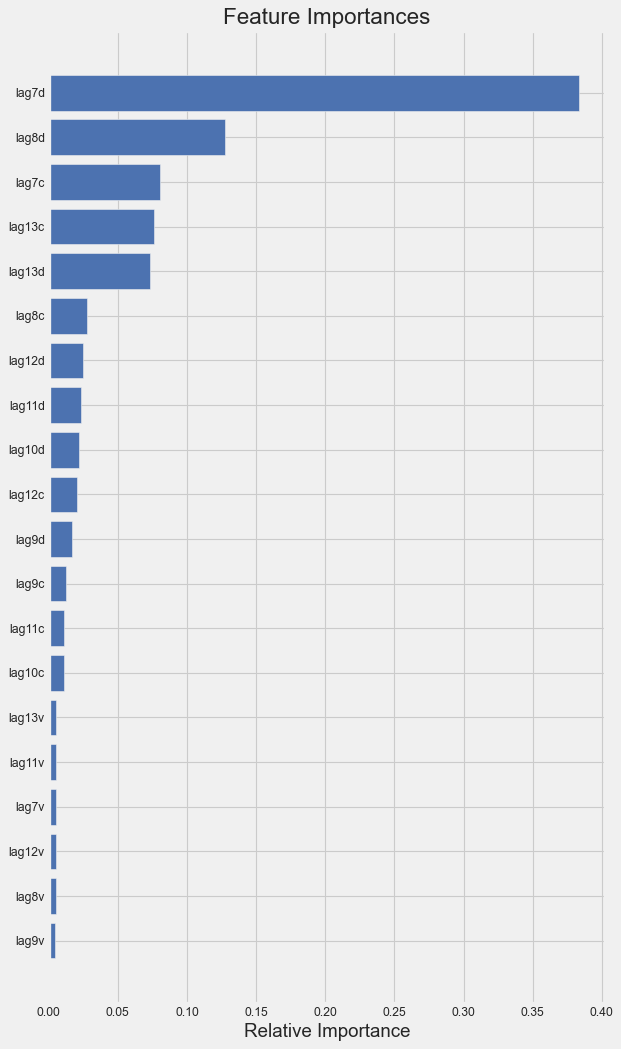

In [609]:
importance_plot(X_train_death_7,rf_final_model_death_list["rf_final_model_death_7"])

In [438]:
for i in num:
    with open('RF_model_'+str(i+1)+'_death.cpickle', 'wb') as f:
        cPickle.dump(rf_final_model_death_list['rf_final_model_death_'+str(i+1)], f)

In [440]:
rf_model_death_list = {}
for i in num:
    with open('RF_model_'+str(i+1)+'_death.cpickle', 'rb') as f:
        rf_model_death_list['rf_model_death_'+str(i+1)] = cPickle.load(f)

## Validation

In [449]:
name_val_list = ['validation_set_1',
                 'validation_set_2',
                 'validation_set_3',
                 'validation_set_4',
                 'validation_set_5',
                 'validation_set_6',
                 'validation_set_7']

In [455]:
validation_set_list_2 = {}

In [456]:
for i in num:
    validation_set_list_2[name_val_list[i]] = validation_set_list[name_val_list[i]].groupby("State").nth(i)
    

In [ ]:
for i in num:
    validation_set_list_2[name_val_list[i]]

In [489]:
val_X_1 = validation_set_list_2['validation_set_1'].drop(columns=['Daily_Death', 'Daily_Case','Date','state'])
val_X_1 = pd.get_dummies(val_X_1)

val_case_1 = validation_set_list_2['validation_set_1'][['Date','Daily_Death', 'Daily_Case']]

val_case_1["Predict Cases"] = rf_final_model_case_list['rf_final_model_case_1'].predict(val_X_1)
val_case_1["Predict Deaths"] = rf_final_model_death_list['rf_final_model_death_1'].predict(val_X_1)

val_case_1.reset_index(level=0, inplace=True)

<ipython-input-489-f60da3be9c75>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_case_1["Predict Cases"] = rf_final_model_case_list['rf_final_model_case_1'].predict(val_X_1)
<ipython-input-489-f60da3be9c75>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_case_1["Predict Deaths"] = rf_final_model_death_list['rf_final_model_death_1'].predict(val_X_1)


In [487]:
val_X_2 = validation_set_list_2['validation_set_2'].drop(columns=['Daily_Death', 'Daily_Case','Date','state'])
val_X_2 = pd.get_dummies(val_X_2)

val_case_2 = validation_set_list_2['validation_set_2'][['Date','Daily_Death', 'Daily_Case']]

val_case_2["Predict Cases"] = rf_final_model_case_list['rf_final_model_case_2'].predict(val_X_2)
val_case_2["Predict Deaths"] = rf_final_model_death_list['rf_final_model_death_2'].predict(val_X_2)

val_case_2.reset_index(level=0, inplace=True)

<ipython-input-487-693e44b77958>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_case_2["Predict Cases"] = rf_final_model_case_list['rf_final_model_case_2'].predict(val_X_2)
<ipython-input-487-693e44b77958>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_case_2["Predict Deaths"] = rf_final_model_death_list['rf_final_model_death_2'].predict(val_X_2)


In [490]:
val_X_3 = validation_set_list_2['validation_set_3'].drop(columns=['Daily_Death', 'Daily_Case','Date','state'])
val_X_3 = pd.get_dummies(val_X_3)

val_case_3 = validation_set_list_2['validation_set_3'][['Date','Daily_Death', 'Daily_Case']]

val_case_3["Predict Cases"] = rf_final_model_case_list['rf_final_model_case_3'].predict(val_X_3)
val_case_3["Predict Deaths"] = rf_final_model_death_list['rf_final_model_death_3'].predict(val_X_3)

val_case_3.reset_index(level=0, inplace=True)

<ipython-input-490-d7195461827c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_case_3["Predict Cases"] = rf_final_model_case_list['rf_final_model_case_3'].predict(val_X_3)
<ipython-input-490-d7195461827c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_case_3["Predict Deaths"] = rf_final_model_death_list['rf_final_model_death_3'].predict(val_X_3)


In [499]:
val_X_4 = validation_set_list_2['validation_set_4'].drop(columns=['Daily_Death', 'Daily_Case','Date','state'])
val_X_4 = pd.get_dummies(val_X_4)

val_case_4 = validation_set_list_2['validation_set_4'][['Date','Daily_Death', 'Daily_Case']]

val_case_4["Predict Cases"] = rf_final_model_case_list['rf_final_model_case_4'].predict(val_X_4)
val_case_4["Predict Deaths"] = rf_final_model_death_list['rf_final_model_death_4'].predict(val_X_4)

val_case_4.reset_index(level=0, inplace=True)

<ipython-input-499-c5b887a79aa3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_case_4["Predict Cases"] = rf_final_model_case_list['rf_final_model_case_4'].predict(val_X_4)
<ipython-input-499-c5b887a79aa3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_case_4["Predict Deaths"] = rf_final_model_death_list['rf_final_model_death_4'].predict(val_X_4)


In [504]:
val_X_5 = validation_set_list_2['validation_set_5'].drop(columns=['Daily_Death', 'Daily_Case','Date','state'])
val_X_5 = pd.get_dummies(val_X_5)

val_case_5 = validation_set_list_2['validation_set_5'][['Date','Daily_Death', 'Daily_Case']]

val_case_5["Predict Cases"] = rf_final_model_case_list['rf_final_model_case_5'].predict(val_X_5)
val_case_5["Predict Deaths"] = rf_final_model_death_list['rf_final_model_death_5'].predict(val_X_5)

val_case_5.reset_index(level=0, inplace=True)

<ipython-input-504-74fc88b01a21>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_case_5["Predict Cases"] = rf_final_model_case_list['rf_final_model_case_5'].predict(val_X_5)
<ipython-input-504-74fc88b01a21>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_case_5["Predict Deaths"] = rf_final_model_death_list['rf_final_model_death_5'].predict(val_X_5)


In [505]:
val_X_6 = validation_set_list_2['validation_set_6'].drop(columns=['Daily_Death', 'Daily_Case','Date','state'])
val_X_6 = pd.get_dummies(val_X_6)

val_case_6 = validation_set_list_2['validation_set_6'][['Date','Daily_Death', 'Daily_Case']]

val_case_6["Predict Cases"] = rf_final_model_case_list['rf_final_model_case_6'].predict(val_X_6)
val_case_6["Predict Deaths"] = rf_final_model_death_list['rf_final_model_death_6'].predict(val_X_6)

val_case_6.reset_index(level=0, inplace=True)

<ipython-input-505-2992e882160a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_case_6["Predict Cases"] = rf_final_model_case_list['rf_final_model_case_6'].predict(val_X_6)
<ipython-input-505-2992e882160a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_case_6["Predict Deaths"] = rf_final_model_death_list['rf_final_model_death_6'].predict(val_X_6)


In [506]:
val_X_7 = validation_set_list_2['validation_set_7'].drop(columns=['Daily_Death', 'Daily_Case','Date','state'])
val_X_7 = pd.get_dummies(val_X_7)

val_case_7 = validation_set_list_2['validation_set_7'][['Date','Daily_Death', 'Daily_Case']]

val_case_7["Predict Cases"] = rf_final_model_case_list['rf_final_model_case_7'].predict(val_X_7)
val_case_7["Predict Deaths"] = rf_final_model_death_list['rf_final_model_death_7'].predict(val_X_7)

val_case_7.reset_index(level=0, inplace=True)

<ipython-input-506-a211840f73a8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_case_7["Predict Cases"] = rf_final_model_case_list['rf_final_model_case_7'].predict(val_X_7)
<ipython-input-506-a211840f73a8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_case_7["Predict Deaths"] = rf_final_model_death_list['rf_final_model_death_7'].predict(val_X_7)


## Validation 

In [517]:
val_df = val_case_1.append([val_case_2,val_case_3,val_case_4,val_case_5,val_case_6,val_case_7])

In [519]:
val_df_2 = val_df.copy(deep = True)

In [518]:
val_df.sort_values(by = ["State","Date"])

State       Date  Daily_Death  Daily_Case  Predict Cases  \
0                Alabama 2021-11-15            2         652     850.670789   
0                Alabama 2021-11-16            0         642     920.083155   
0                Alabama 2021-11-17            1         622     886.088764   
0                Alabama 2021-11-18            0         774     739.479698   
0                Alabama 2021-11-19            2         626     750.911977   
0                Alabama 2021-11-20            0         263     420.360630   
0                Alabama 2021-11-21            0         219     347.134493   
1                 Alaska 2021-11-15            2        1069    1081.065752   
1                 Alaska 2021-11-16            7         345     546.846326   
1                 Alaska 2021-11-17            2         437     509.436910   
1                 Alaska 2021-11-18            0         517     320.872144   
1                 Alaska 2021-11-19           20         514     767.222790   
1                 Alaska 2021-11-20            0           0      96.369652   
1                 Alaska 2021-11-21            0           0      82.733833   
2                Arizona 2021-11-15            0        2774    2691.279757   
2                Arizona 2021-11-16           83        3240    3174.350570   
2                Arizona 2021-11-17           16        3459    3537.686924   
2                Arizona 2021-11-18           56        4184    3727.875014   
2                Arizona 2021-11-19           78        5070    4035.443735   
2                Arizona 2021-11-20           53        5103    3680.062526   
2                Arizona 2021-11-21            1        3629    2958.663107   
3               Arkansas 2021-11-15           12         151     263.934252   
3               Arkansas 2021-11-16           13         814     608.768742   
3               Arkansas 2021-11-17            3         828     707.559144   
3               Arkansas 2021-11-18            4         907     713.991973   
3               Arkansas 2021-11-19            9         732     663.271201   
3               Arkansas 2021-11-20            4         674     567.692332   
3               Arkansas 2021-11-21            3         304     454.277355   
4             California 2021-11-15          134        8410   10271.798142   
4             California 2021-11-16           20        4515    8472.731117   
4             California 2021-11-17          128        3912    7337.905327   
4             California 2021-11-18          129        7799    6562.756023   
4             California 2021-11-19          153        5327    7431.565060   
4             California 2021-11-20            0           0    6973.411652   
4             California 2021-11-21            0           0    6832.932883   
5               Colorado 2021-11-15           81        7470    7148.289320   
5               Colorado 2021-11-16           56        2738    2947.553890   
5               Colorado 2021-11-17           26        4244    3795.707506   
5               Colorado 2021-11-18           51        4602    3885.432495   
5               Colorado 2021-11-19           44        3720    3781.680200   
5               Colorado 2021-11-20            0           0      76.589033   
5               Colorado 2021-11-21            0           0     165.930452   
6            Connecticut 2021-11-15           17        2179     892.963938   
6            Connecticut 2021-11-16            0         544     539.046174   
6            Connecticut 2021-11-17            8         838     561.355823   
6            Connecticut 2021-11-18            0         747     559.387119   
6            Connecticut 2021-11-19           16         860     557.564970   
6            Connecticut 2021-11-20            0           0      78.678771   
6            Connecticut 2021-11-21            0           0     102.391640   
7               Delaware 2021-11-15            0         274     250.

In [525]:
val_us = val_df_2.groupby("Date").sum()

In [527]:
val_us.reset_index(level=0, inplace=True)

In [529]:
val_us["State"] = "United States"

In [531]:
val_us = val_us[['State', 'Date', 'Daily_Death', 'Daily_Case', 'Predict Cases','Predict Deaths']]


In [548]:
val_df_final = val_us.append(val_df.sort_values(by = ["State","Date"]))

In [549]:

val_df_final = val_df_final[['State', 'Date', 'Daily_Case', 'Predict Cases', 'Daily_Death','Predict Deaths']]

val_df_final


State       Date  Daily_Case  Predict Cases  Daily_Death  \
0          United States 2021-11-15      144771  118866.363823         1058   
1          United States 2021-11-16       95092   96109.233345         1419   
2          United States 2021-11-17      103479   92016.276608         1225   
3          United States 2021-11-18      111823   83542.230023         1097   
4          United States 2021-11-19      113589  107725.603613         1677   
5          United States 2021-11-20       32250   49878.300339          269   
6          United States 2021-11-21       24995   41981.049612           85   
0                Alabama 2021-11-15         652     850.670789            2   
0                Alabama 2021-11-16         642     920.083155            0   
0                Alabama 2021-11-17         622     886.088764            1   
0                Alabama 2021-11-18         774     739.479698            0   
0                Alabama 2021-11-19         626     750.911977            2   
0                Alabama 2021-11-20         263     420.360630            0   
0                Alabama 2021-11-21         219     347.134493            0   
1                 Alaska 2021-11-15        1069    1081.065752            2   
1                 Alaska 2021-11-16         345     546.846326            7   
1                 Alaska 2021-11-17         437     509.436910            2   
1                 Alaska 2021-11-18         517     320.872144            0   
1                 Alaska 2021-11-19         514     767.222790           20   
1                 Alaska 2021-11-20           0      96.369652            0   
1                 Alaska 2021-11-21           0      82.733833            0   
2                Arizona 2021-11-15        2774    2691.279757            0   
2                Arizona 2021-11-16        3240    3174.350570           83   
2                Arizona 2021-11-17        3459    3537.686924           16   
2                Arizona 2021-11-18        4184    3727.875014           56   
2                Arizona 2021-11-19        5070    4035.443735           78   
2                Arizona 2021-11-20        5103    3680.062526           53   
2                Arizona 2021-11-21        3629    2958.663107            1   
3               Arkansas 2021-11-15         151     263.934252           12   
3               Arkansas 2021-11-16         814     608.768742           13   
3               Arkansas 2021-11-17         828     707.559144            3   
3               Arkansas 2021-11-18         907     713.991973            4   
3               Arkansas 2021-11-19         732     663.271201            9   
3               Arkansas 2021-11-20         674     567.692332            4   
3               Arkansas 2021-11-21         304     454.277355            3   
4             California 2021-11-15        8410   10271.798142          134   
4             California 2021-11-16        4515    8472.731117           20   
4             California 2021-11-17        3912    7337.905327          128   
4             California 2021-11-18        7799    6562.756023          129   
4             California 2021-11-19        5327    7431.565060          153   
4             California 2021-11-20           0    6973.411652            0   
4             California 2021-11-21           0    6832.932883            0   
5               Colorado 2021-11-15        7470    7148.289320           81   
5               Colorado 2021-11-16        2738    2947.553890           56   
5               Colorado 2021-11-17        4244    3795.707506           26   
5               Colorado 2021-11-18        4602    3885.432495           51   
5               Colorado 2021-11-19        3720    3781.680200           44   
5               Colorado 2021-11-20           0      76.589033            0   
5               Colorado 2021-11-21           0     165.930452            0   
6            Connecticut 2021-11-15        2179     892.963938       

In [542]:
val_df_final_end = val_df_final.rename(columns = {'Daily_Case': "True Cases",
                               'Daily_Death': "True Deaths"}).reset_index(drop = True)

In [550]:
val_df_final_end

State       Date  True Cases  Predict Cases  True Deaths  \
0           United States 2021-11-15      144771  118866.363823         1058   
1           United States 2021-11-16       95092   96109.233345         1419   
2           United States 2021-11-17      103479   92016.276608         1225   
3           United States 2021-11-18      111823   83542.230023         1097   
4           United States 2021-11-19      113589  107725.603613         1677   
5           United States 2021-11-20       32250   49878.300339          269   
6           United States 2021-11-21       24995   41981.049612           85   
7                 Alabama 2021-11-15         652     850.670789            2   
8                 Alabama 2021-11-16         642     920.083155            0   
9                 Alabama 2021-11-17         622     886.088764            1   
10                Alabama 2021-11-18         774     739.479698            0   
11                Alabama 2021-11-19         626     750.911977            2   
12                Alabama 2021-11-20         263     420.360630            0   
13                Alabama 2021-11-21         219     347.134493            0   
14                 Alaska 2021-11-15        1069    1081.065752            2   
15                 Alaska 2021-11-16         345     546.846326            7   
16                 Alaska 2021-11-17         437     509.436910            2   
17                 Alaska 2021-11-18         517     320.872144            0   
18                 Alaska 2021-11-19         514     767.222790           20   
19                 Alaska 2021-11-20           0      96.369652            0   
20                 Alaska 2021-11-21           0      82.733833            0   
21                Arizona 2021-11-15        2774    2691.279757            0   
22                Arizona 2021-11-16        3240    3174.350570           83   
23                Arizona 2021-11-17        3459    3537.686924           16   
24                Arizona 2021-11-18        4184    3727.875014           56   
25                Arizona 2021-11-19        5070    4035.443735           78   
26                Arizona 2021-11-20        5103    3680.062526           53   
27                Arizona 2021-11-21        3629    2958.663107            1   
28               Arkansas 2021-11-15         151     263.934252           12   
29               Arkansas 2021-11-16         814     608.768742           13   
30               Arkansas 2021-11-17         828     707.559144            3   
31               Arkansas 2021-11-18         907     713.991973            4   
32               Arkansas 2021-11-19         732     663.271201            9   
33               Arkansas 2021-11-20         674     567.692332            4   
34               Arkansas 2021-11-21         304     454.277355            3   
35             California 2021-11-15        8410   10271.798142          134   
36             California 2021-11-16        4515    8472.731117           20   
37             California 2021-11-17        3912    7337.905327          128   
38             California 2021-11-18        7799    6562.756023          129   
39             California 2021-11-19        5327    7431.565060          153   
40             California 2021-11-20           0    6973.411652            0   
41             California 2021-11-21           0    6832.932883            0   
42               Colorado 2021-11-15        7470    7148.289320           81   
43               Colorado 2021-11-16        2738    2947.553890           56   
44               Colorado 2021-11-17        4244    3795.707506           26   
45               Colorado 2021-11-18        4602    3885.432495           51   
46               Colorado 2021-11-19        3720    3781.680200           44   
47               Colorado 2021-11-20           0      76.589033            0   
48               Colorado 2021-11-21           0     165.930452            0   
49            Connec

In [544]:
val_df_final_end.to_csv('RF_Validation.csv',index = False)

In [571]:
case_rmse = pd.DataFrame(rf_final_rmse_case_list,index=[0]).transpose().reset_index(drop = True)[0]

In [572]:
death_rmse = pd.DataFrame(rf_final_rmse_death_list,index=[0]).transpose().reset_index(drop = True)[0]

In [578]:
case_rmse_base = pd.DataFrame(rf_base_rmse_case_list,index=[0]).transpose().reset_index(drop = True)[0]

case_rmse_base

0    728.818647
1    718.051515
2    773.169667
3    863.758617
4    835.684010
5    876.146092
6    976.531822
Name: 0, dtype: float64

In [579]:
death_rmse_base = pd.DataFrame(rf_base_rmse_death_list,index=[0]).transpose().reset_index(drop = True)[0]


death_rmse_base



0    19.312517
1    16.883758
2    19.578168
3    18.120199
4    17.980095
5    16.513169
6    18.218080
Name: 0, dtype: float64

In [577]:
rf_base_rmse_case_list

{'rf_base_rmse_case_1': 728.818646545664,
 'rf_base_rmse_case_2': 718.0515149174145,
 'rf_base_rmse_case_3': 773.1696673898722,
 'rf_base_rmse_case_4': 863.7586169680801,
 'rf_base_rmse_case_5': 835.6840096587235,
 'rf_base_rmse_case_6': 876.1460918897312,
 'rf_base_rmse_case_7': 976.5318223232637}

In [576]:
rf_base_rmse_death_list

{'rf_base_rmse_death_1': 19.312517284225954,
 'rf_base_rmse_death_2': 16.883758440591563,
 'rf_base_rmse_death_3': 19.57816768524172,
 'rf_base_rmse_death_4': 18.120198803594427,
 'rf_base_rmse_death_5': 17.98009542975219,
 'rf_base_rmse_death_6': 16.513169209410247,
 'rf_base_rmse_death_7': 18.218080144283707}

In [580]:
rmse_df = pd.DataFrame({"Case RMSE":case_rmse,
                        "Case RMSE Before Tuning":case_rmse_base,
                       "Death RMSE":death_rmse,
                       "Death RMSE Before Tuning":death_rmse_base})

In [617]:
rmse_df

Case RMSE  Case RMSE Before Tuning  Death RMSE  Death RMSE Before Tuning
0  695.651439               728.818647   16.409484                 19.312517
1  718.447965               718.051515   15.491574                 16.883758
2  739.317906               773.169667   17.543466                 19.578168
3  818.375039               863.758617   15.610639                 18.120199
4  808.640044               835.684010   16.435141                 17.980095
5  860.451366               876.146092   16.226065                 16.513169
6  936.835402               976.531822   16.633296                 18.218080

In [582]:
rmse_df.to_csv('rmse_df.csv',index = False)